<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/Logistic_Regression_in_tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with Tensorflow

## 0. Import the required libraries:
We will start with importing the required Python libraries.

In [0]:
# Numerical computing
import numpy as np
import tensorflow as tf

# Spliting data into train and test
from sklearn.model_selection import train_test_split

# Visualization
from matplotlib import pyplot as plt
# Different colors for cmap
import matplotlib.cm as cm
import seaborn as sns
sns.set()
%matplotlib inline

## 1. Create some artificial dataset

We created some random variable and stack them up together

In [0]:
np.random.seed(34)

x1 = np.random.randn(500)*0.5+3
x2 = np.random.randn(500)*0.5+2

x3 = np.random.randn(500) *0.5 + 4
x4 = np.random.randn(500) *0.5 + 5

In [0]:
# Creating a matrix

X_1 = np.vstack([x1, x2])
X_2 = np.vstack([x3, x4])
X = np.hstack([X_1, X_2]).T
print(X.shape)

(1000, 2)


In [0]:
# Y true labels
# create classes (0, 1)
Y = np.hstack([np.zeros(500), np.ones(500)])

### 1.1. Checking the size

In [0]:
# check the shape of input data and labels

print("Shape of X is: ", X.shape)
print("Shape of Y is: ", Y.shape)

Shape of X is:  (1000, 2)
Shape of Y is:  (1000,)


### 1.2. Visualization of the data

Text(0.5,1,'Random Dataset')

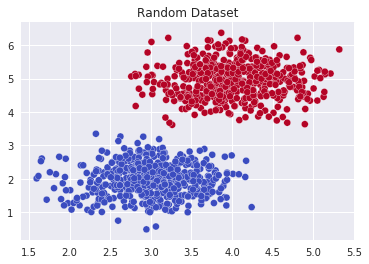

In [0]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap=cm.coolwarm, edgecolors='w');
plt.title('Random Dataset')

### 1.3. Spliting data into train and test

Spliting our dataset into train and test example

In [0]:
# Train -> 80%, Test -> 20%
# This returns our dataset split into training and test examples
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    return X_train, X_test, y_train, y_test

In [0]:
# Spliting our data
X_train, X_test, y_train, y_test = split_data(X, Y)

Now we should reshape your labels as 2d-tensor (the first dimension will be the batch dimension and the second the scalar label):

In [0]:
# Reshape our label to avoid having a rank-1 array (n,)
# Don't use rank-1 arrays when implement logistic regression, instead use a rank-2 arrays (n, 1)
# We are also making sure our datatypes are converted into float32.

# Our vectorized labels
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

To get a better sense of the data, let's checkout the shapes of the loaded arrays.

In [0]:
print('x_train:\t{}'.format(X_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(800, 2)
y_train:	(800, 1)
x_test:		(200, 2)
y_test:		(200, 1)


## 2. Hyperparameters

Hyperparameters are model-specific properties that are fixed before you even train and test your model on data.

In [0]:
# Hyper-parameters
learning_rate = 0.72 # The optimization initial learning rate
num_epochs =  12000 # Total number of training epochs
display_step = 1

## 3. Create the network graph
After defining all our hyperparameters we can now create our network

### 3.1. Placeholders for the inputs (x) and corresponding labels (y)

Placeholder is an object whose value can be specified only later. To specify values for a placeholder, we need to pass in values by using a "feed dictionary"

In [0]:
# data format is as usual:
# X_train and X_train have shape (num_instances, dimension_of_features)
# Y_train and Y_test have shape (num_instances, dimension_of_classes)

dimension_of_features = X_train.shape[1]
dimension_of_classes = y_train.shape[1]

print("Dimension of our features : ",dimension_of_features)
print("Dimension of our class : ",dimension_of_classes)

Dimension of our features :  2
Dimension of our class :  1


Note ** :
1.   X = Dimension of features is known while number of instances is left undefined
2.   Y = Dimension of classes is known, while number of instances is left undefined





In [0]:
# Create the graph for the linear model
# Placeholders for inputs (X) and outputs(Y)
# X and Y are symbolic variable which will contain input data
x = tf.placeholder(dtype=tf.float32, shape=[None, dimension_of_features], name='X_placeholder')
y = tf.placeholder(dtype=tf.float32, shape=[None, dimension_of_classes], name='Y_placeholder')

### 3.2. Initialize our paramaters

In [0]:
W = tf.Variable(tf.random_normal([dimension_of_features, dimension_of_classes])* 0.01, name='weights') # W - weights
b = tf.Variable(tf.zeros([dimension_of_classes, dimension_of_classes]), name='bias') # b - bias 

# Add summary ops to collect data
w_h = tf.summary.histogram("weights", W)
b_h = tf.summary.histogram("biases", b)

### 3.3. Forward propagation

In [0]:
# Forward-propagation
# Define a simple logistic model z=wx+b
# y_pred will contain predictions the model makes.
prediction = tf.nn.sigmoid(tf.matmul(x, W) + b)

### 3.4. Define the loss and cost function, optimizer, accuracy, and predicted class

After creating the network, we have to calculate the loss and optimize it. Also, to evaluate our model, we have to calculate the correct_prediction and accuracy. 

In [0]:
# Define the loss function, optimizer, and accuracy

# Cost function
lost = tf.nn.sigmoid_cross_entropy_with_logits(logits=prediction, labels=y)
cost = tf.reduce_mean(lost)

# Create a summary to monitor the cost function
tf.summary.scalar("cost_function", cost)

# Back-propagation
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate, name='Gradient-optimizer').minimize(cost)

# If the prediction is greater than 0.5, it should be considered as class 1, otherwise class 0
correct_prediction = tf.equal(y,(tf.to_float(tf.greater(prediction, 0.5)))) 

# Calculate our models performance, but first we need to convert our datatype from true and false, into 1 and 0
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

### 3.5. Initialize all variables
Here, we have to invoke a variable initializer operation to initialize all variables.

In [0]:
# Create the operation for initializing all variables
init = tf.global_variables_initializer()

# Merge all summaries into a single operator
merged_summary_op = tf.summary.merge_all()

## 4. Train
After creating the graph, we have to create a session and run the graph in our session to train the model.

In [0]:
with tf.Session() as session:

    # run the initialization
    session.run(init)
    
    # visualize on tensorboard
    # tensorboard --logdir='logistic_regression'
    summary_writer =tf.summary.FileWriter('logistic_regression',session.graph)
    
    # keep track of the cost, weight and bias for visualization
    costs = []
    weight_final = []
    bias_final = []
    
    # training loop
    for epoch in range(num_epochs):

        # feeding data to our placeholders
        feed_dict_train = {x: X_train, y: y_train}
        _ , c, prediction_values = session.run([optimizer, cost, prediction], feed_dict={x: X_train, y: y_train})
        
        # Save the cost result
        costs.append(c)
        
        # Display logs per 1000 epoch step
        if epoch % 1000 == 0:
            
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c),\
                "W=", session.run(W), "b=", session.run(b))
        
        # Write logs for each epoch
        summary_str = session.run(merged_summary_op, feed_dict={x: X_train, y: y_train})  
        summary_writer.add_summary(summary_str,  epoch)
    
    # Store our final weigh and bias.
    weight_final = session.run(W)
    bias_final = session.run(b)
    
    print("\nOptimization Finished!\n")
    print ("Train Accuracy:", accuracy.eval({x: X_train, y: y_train}))
    print ("Test Accuracy:", accuracy.eval({x: X_test, y: y_test}))

Epoch: 0001 cost= 0.719014406 W= [[-0.03587395]
 [ 0.07200369]] b= [[-0.02077861]]
Epoch: 1001 cost= 0.523121893 W= [[-2.6496155]
 [ 4.1953073]] b= [[-5.206567]]
Epoch: 2001 cost= 0.515678346 W= [[-2.3614166]
 [ 4.5461483]] b= [[-7.454811]]
Epoch: 3001 cost= 0.511754811 W= [[-1.9665124]
 [ 4.6120896]] b= [[-9.081244]]
Epoch: 4001 cost= 0.509378672 W= [[-1.6242684]
 [ 4.6293907]] b= [[-10.340239]]
Epoch: 5001 cost= 0.507836521 W= [[-1.3526834]
 [ 4.649271 ]] b= [[-11.356238]]
Epoch: 6001 cost= 0.506765962 W= [[-1.1369226]
 [ 4.6774325]] b= [[-12.205626]]
Epoch: 7001 cost= 0.505980134 W= [[-0.96183383]
 [ 4.7118926 ]] b= [[-12.935602]]
Epoch: 8001 cost= 0.505377889 W= [[-0.8165428]
 [ 4.7503433]] b= [[-13.576203]]
Epoch: 9001 cost= 0.504900873 W= [[-0.69362485]
 [ 4.7911386 ]] b= [[-14.147423]]
Epoch: 10001 cost= 0.504513085 W= [[-0.587881]
 [ 4.833122]] b= [[-14.663178]]
Epoch: 11001 cost= 0.504191220 W= [[-0.49565807]
 [ 4.87556   ]] b= [[-15.133555]]

Optimization Finished!

Train Acc

### 4.1. Visualizing our cost
Summary of our cost after 3000 Epochs

Text(0.5,0,'Number of Iterations ')

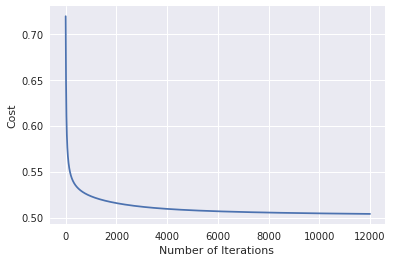

In [0]:
# plot the cost
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Number of Iterations ')

In [0]:
cost_max = np.max(costs)
cost_min = np.min(costs)
print("Maximum Cost : {:.4f}".format(np.max(costs)))
print("")
print("Minimum Cost : {:.4f}".format(np.min(costs)))
print("")
print("Cost difference : {:.4f}".format((cost_max - cost_min)))

Maximum Cost : 0.7190

Minimum Cost : 0.5039

Cost difference : 0.2151


## 5. Visualization

Now we need to get a sense of what our weight and bias values 

In [0]:
w1_final = weight_final[0, -1]
w2_final = weight_final[1, -1]
b_final =  bias_final[-1,-1]

print("Weight 1 : ",w1_final)
print("Weight 2 : ",w2_final)
print("Bias : ",b_final)

Weight 1 :  -0.41431707
Weight 2 :  4.9178934
Bias :  -15.565682


Finally, we can draw our best fitted line, using the equation

Probability

Text(0,0.5,'feature 2')

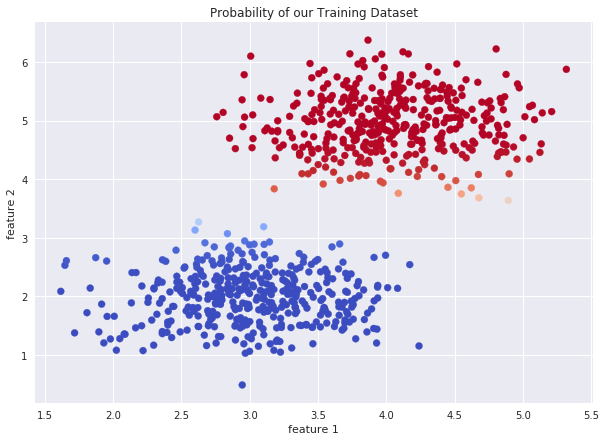

In [0]:
plt.figure(figsize =(10,7))
plt.scatter(X_train[:,0], X_train[:,1], c=prediction_values[:, 0], cmap=cm.coolwarm)
plt.title('Probability of our Training Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

Training data

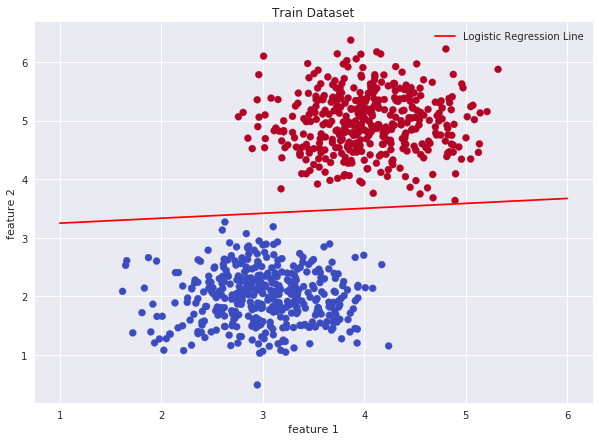

In [0]:
x_axis = np.linspace(1, 6)
yy_lr = -(w1_final/w2_final)*x_axis - b_final/w2_final


plt.figure(figsize =(10,7))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train[:, 0], cmap=cm.coolwarm)
plt.plot(x_axis, yy_lr, label = 'Logistic Regression Line', c='r')
plt.title('Train Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()


Test Data

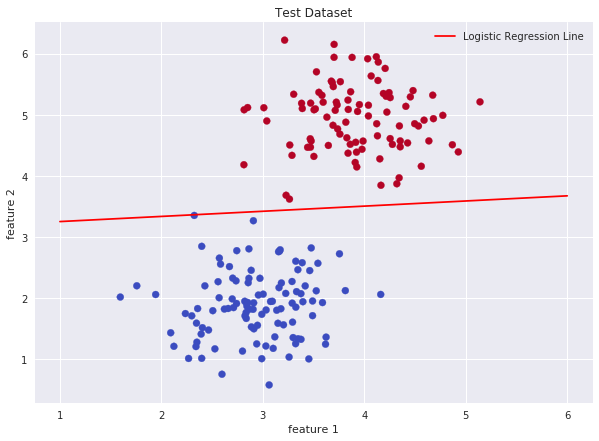

In [0]:
x_axis = np.linspace(1, 6)
yy_lr = -(w1_final/w2_final)*x_axis - b_final/w2_final



plt.figure(figsize =(10,7))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test[:, 0], cmap=cm.coolwarm)
plt.plot(x_axis, yy_lr, label = 'Logistic Regression Line', c='r')
plt.title('Test Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()

For more information about logistic regression, visit our website [datahacker.rs](http://datahacker.rs/blog/)
